# Matemática para Ciencia de los Datos
# Trabajo Práctico 2

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Jueves 15 de Noviembre del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Sophia Contreras**
1. **Yoksan Varela**



---

**Pregunta 1**

Considerando que la transpuesta de una matriz es el resultado de cambiar las filas a columnas. Sea una matriz $A\in\mathbb{R}^{m\times n}$, su transpuesta se escribe como $A^{T}\in\mathbb{R}^{n\times m}$ y sus entradas están dadas por: 

\begin{equation}
\left(A^{T}\right)_{i,j}=A_{j,i}.
\end{equation}

Proponga Usted dos matrices, $A\in\mathbb{R}^{4\times 3}$ y $B\in\mathbb{R}^{3\times 4}$ (no las busque en Internet, trate de proponer los valores por si mismo), y utilizando numpy muestre que las siguientes propiedades se cumplen con sus matrices propuestas.

**Note** que ni A ni B son cuadradas, y no tienen las mismas dimensiones.


**1.1 (15 puntos)**

- $\left(A^{T}\right)^{T}=A$


In [1]:
###############################################################################
%matplotlib inline
import math 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.linalg import matrix_rank
from numpy import linalg as LA
###############################################################################

A = np.array([  [8. , 2. , 1. ], 
                [4. , 6. , 5. ], 
                [10. , 12. , 15.],
                [3. , 2. , 1. ]])

B = np.array([  [4. , 5. , 5. , 4], 
                [8. , 2. , 6. , 10], 
                [9. , 7. , 8. , 6]])

print("Matriz original de A: \n"+ str(A))

aT = np.transpose(A)
print("Matriz Transpuesta de A: \n"+ str(aT))
      
aTT = np.transpose(aT)
print("Matriz Transpuesta de AT: \n"+ str(aTT))

Matriz original de A: 
[[ 8.  2.  1.]
 [ 4.  6.  5.]
 [10. 12. 15.]
 [ 3.  2.  1.]]
Matriz Transpuesta de A: 
[[ 8.  4. 10.  3.]
 [ 2.  6. 12.  2.]
 [ 1.  5. 15.  1.]]
Matriz Transpuesta de AT: 
[[ 8.  2.  1.]
 [ 4.  6.  5.]
 [10. 12. 15.]
 [ 3.  2.  1.]]


**1.2 (15 puntos)**

- $\left(AB\right)^{T}=B^{T}A^{T}$


In [2]:
ab = np.matmul(A,B)
print("Matriz de la Multiplicacion entre A y B: \n"+ str(ab))

abT = np.transpose(ab)
print("Matriz Transpuesta de la Multiplicacion entre A y B: \n"+ str(abT))

print("Matriz original de B: \n"+ str(B))

bT = np.transpose(B)
print("Matriz Transpuesta de B: \n"+ str(bT))

mult_aTbT = np.matmul(bT,aT)
print("Mutiplicacion de BT y AT: \n"+ str(mult_aTbT))

Matriz de la Multiplicacion entre A y B: 
[[ 57.  51.  60.  58.]
 [109.  67.  96. 106.]
 [271. 179. 242. 250.]
 [ 37.  26.  35.  38.]]
Matriz Transpuesta de la Multiplicacion entre A y B: 
[[ 57. 109. 271.  37.]
 [ 51.  67. 179.  26.]
 [ 60.  96. 242.  35.]
 [ 58. 106. 250.  38.]]
Matriz original de B: 
[[ 4.  5.  5.  4.]
 [ 8.  2.  6. 10.]
 [ 9.  7.  8.  6.]]
Matriz Transpuesta de B: 
[[ 4.  8.  9.]
 [ 5.  2.  7.]
 [ 5.  6.  8.]
 [ 4. 10.  6.]]
Mutiplicacion de BT y AT: 
[[ 57. 109. 271.  37.]
 [ 51.  67. 179.  26.]
 [ 60.  96. 242.  35.]
 [ 58. 106. 250.  38.]]


**1.3 (15 puntos)**

Para este ejercicio, **proponga dos matrices de igual dimensionalidad**


- $\left(A+B\right)^{T}=A^{T}+B^{T}$.


In [3]:
A = np.array([  [5. , 4. , 1. ], 
                [6. , 8. , 3. ], 
                [8. , 9. , 4.]])

B = np.array([  [7. , 4. , 2. ], 
                [7. , 5. , 2. ], 
                [5. , 8. , 9.]])

add_T = np.transpose(A+B)
print("Transpuesta de la suma de A y B: \n"+ str(add_T))

aT = np.transpose(A)
bT = np.transpose(B)
add_aTbT = aT + bT
print("Suma de AT y BT: \n"+ str(add_aTbT))

Transpuesta de la suma de A y B: 
[[12. 13. 13.]
 [ 8. 13. 17.]
 [ 3.  5. 13.]]
Suma de AT y BT: 
[[12. 13. 13.]
 [ 8. 13. 17.]
 [ 3.  5. 13.]]


---

**Pregunta 2**


Un conjunto de vectores $\left\{ \vec{x}_{1},\vec{x}_{2},\ldots,\vec{x}_{n}\right\} \in\mathbb{R}^{m}$ se dice que es linealmente independiente, si ningún vector de tal conjunto puede ser representado como una combinación lineal del resto de vectores. De lo contrario, si uno de los vectores en tal conjunto puede ser representado como una combinación lineal del resto de vectores, entonces los vectores son linealmente dependientes, lo que se expresa como: 

\begin{equation}
\vec{x}_{j}=\sum_{i=1}^{n-1}\alpha_{i}\vec{x}_{i}
\end{equation}

para cualquier conjunto de valores escalares $\alpha_{1},\ldots,\alpha_{n-1}\in\mathbb{R}$ se dice que el vector $\vec{x}_{j}\in\mathbb{R}^{m}$ es linealmente dependiente de los vectores $\vec{x}_{i}$. 


**2.1 (15 puntos)**

Proponga una matriz $A\in\mathbb{R}^{4\times 3}$, cuyos vectores columnas sean linealmente independientes, calcule su rango para mostrar que es de rango $3$ (puede utilizar matrix_rank).


In [4]:
# Matriz hecha para que tenga 3 vectores columna:
A1 = np.array([  [8. , 4. , 5. ], 
                [7. , 6. , 7. ], 
                [3. , 5. , 9. ],
                [9. , 5. , 6. ]])

print("Rango de la Matriz: "+str(matrix_rank(A1)))

Rango de la Matriz: 3


**2.2 (15 puntos)**

Ahora haga los cambios necesarios a su matriz de manera que pase a rango $2$. 

In [5]:
# Matriz hecha para que tenga 2 vectores columna independientes:
A2 = np.array([  [8. , 4. , 16. ], 
                [7. , 6. , 19. ], 
                [3. , 5. , 13. ],
                [9. , 5. , 19. ]])

print("Rango de la Matriz: "+str(matrix_rank(A2)))

Rango de la Matriz: 2


---

**Pregunta 3 (25 puntos)**

Utilizando el archivo "Dataset_usar.csv", haga:
- Cargue el archivo.
- Utilizando el modelo $Ax=b$
    - Conforme la matriz $A$ con las primeras 8 columnas.
    - Conforme el vector $b$ con la última columna de la derecha.
    - Calcule el vector de pesos ($x$), del tipo $A^{-1}b=x$
    - Calcule un b_estimado con $A$ e $x$
    - Calcule la norma 2 de la diferencia entre b y b_estimado.
    - Grafique b y b_estimado.



In [6]:
archivo = "Dataset_usar.csv"

dataFrame = pd.read_csv(archivo, header = 0, delimiter=';')
colNames = dataFrame.columns
print(dataFrame.head())

   bias    Length  Diameter    Height     Whole   Shucked  Sex_Female  \
0     1  0.186567  0.155963  0.195652  0.011688  0.333333           0   
1     1  0.813433  0.761468  0.826087  0.433327  0.333333           1   
2     1  0.410448  0.376147  0.369565  0.074022  0.333333           1   
3     1  0.537313  0.504587  0.500000  0.143085  0.333333           1   
4     1  0.507463  0.495413  0.565217  0.146981  0.333333           0   

   Sex_Masculine  Shellweight  
0              1        0.010  
1              0        0.435  
2              0        0.068  
3              0        0.096  
4              1        0.144  


In [7]:
# Convertir de pandas a numpy
test = pd.DataFrame(dataFrame).to_numpy()

# ver dimensiones
total_columnas = test.shape[1] # columnas
total_filas = test.shape[0] # filas
print("Total filas ", total_filas)
print("Total columnas ", total_columnas)

Total filas  998
Total columnas  9


In [8]:
def muestreVectorConNombre( pVector , pNombres):
    for i in range( len(pVector)):
        print( pNombres[i] , " : ", pVector[i] )
    print("\n")

In [9]:
# Conforme la matriz A con las primeras 8 columnas y Conforme el vector b con la última columna de la derecha

# A , 8 columnas
# bias, Length, Diameter, Height, Whole, Shucked, Sex_Female, Sex_Masculine
A = test[:, 0:total_columnas - 1] # todas menos la última
print("Primer fila de A: ")
muestreVectorConNombre( A[0], colNames)

# b  , 1 columna
# Shellweight
b = test[:, total_columnas - 1]  # la última
print("Primeros elementos de b: ", b[0:5])

Primer fila de A: 
bias  :  1.0
Length  :  0.186567164
Diameter  :  0.155963303
Height  :  0.195652174
Whole  :  0.011687622
Shucked  :  0.333333333
Sex_Female  :  0.0
Sex_Masculine  :  1.0


Primeros elementos de b:  [0.01  0.435 0.068 0.096 0.144]


In [10]:
# Calcule el vector de pesos (𝑥), del tipo  A^(-1)*b = x
x = np.dot(LA.pinv(A),b)
print("Vector de pesos x:\n"+str(x))

Vector de pesos x:
[ 0.01298003 -0.07107447  0.00203732  0.08440335  0.89314748 -0.07685081
  0.00639926  0.00658077]


In [11]:
# Calcule un b_estimado con A e x
b_estimado = np.matmul(A, x)
print("Valor de b estimado:\n" + str(b_estimado))

Valor de b estimado:
[0.00795392 0.39424921 0.06266108 0.12659862 0.13786722 0.10189529
 0.0095726  0.40654214 0.17761661 0.29570968 0.27953112 0.25306109
 0.17372371 0.17123082 0.24563351 0.27945597 0.35743935 0.53538113
 0.63780604 0.08449686 0.09339824 0.17184747 0.37209852 0.05155341
 0.04107342 0.1337257  0.05592014 0.05819802 0.19792255 0.19450077
 0.05736149 0.03909061 0.14607987 0.27361606 0.0927977  0.04701044
 0.38886303 0.05878864 0.04494088 0.14571031 0.28453475 0.0564301
 0.1797985  0.34269521 0.52628498 0.13221085 0.48299815 0.29003694
 0.40972321 0.0716018  0.34926074 0.01547366 0.25417031 0.41022259
 0.25148249 0.07914457 0.12938356 0.14991186 0.46912752 0.03917065
 0.21487825 0.27971381 0.13980379 0.22335389 0.30076126 0.14794345
 0.17669062 0.31993973 0.32715262 0.02115316 0.20243816 0.36883371
 0.31379943 0.41031155 0.1965695  0.33344826 0.02516699 0.34924829
 0.0635543  0.11626176 0.00618232 0.15461345 0.09875346 0.35219295
 0.12655004 0.23123311 0.14167154 0.058981

In [12]:
# Calcule la norma 2 de la diferencia entre b y b_estimado
dif_b_bEstimado = LA.norm(b - b_estimado)
print("Entre b y b_estimado: ", dif_b_bEstimado)

Entre b y b_estimado:  1.2226067361507618


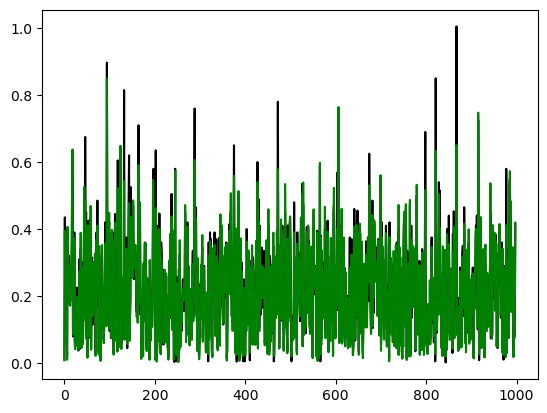

In [13]:
# Grafique b y b_estimado
cantidad_muestras = len(b)
eje_X = np.array(range(cantidad_muestras))

plt. plot(eje_X, b, label = "b", color="k") # black
plt. plot(eje_X, b_estimado, label = "b_estimado", color= "g") # green

plt.show()

In [14]:
import plotly.express as px
# https://plotly.com/python/

parte1 = np.array([x for x in range(len(b))])
parte2 = np.array([x for x in range(len(b_estimado))])

x = np.concatenate((parte1, parte2))
y = np.concatenate((parte1, parte2))

z = np.concatenate((np.array(b) , np.array(b_estimado)))

parteColor1 = ["b" for x in range(len(b))]
parteColor2 = ["b_estimado" for x in range(len(b_estimado))]

colorLine = parteColor1 + parteColor2
df1 = pd.DataFrame({"x": x, "y":y, "z":z, "color":colorLine})
df1['tamano'] = 0.25
fig = px.scatter_3d(df1, x="x", y="y", z="z", color="color", size = "tamano")
fig.show()

fig.write_html("Graficación.html")